In [658]:
import pandas as pd
import numpy as np

In [659]:
df = pd.read_csv('updated_train.csv')
df_test = pd.read_csv('updated_test.csv')

# Exporation, Language Understand

In [660]:
df.shape

(5287, 3)

In [661]:
df_test.shape

(1962, 2)

In [662]:
df.head()

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1
3,train_3,India is likely to run out of the remaining RN...,1
4,train_4,In these tough times the best way to grow is t...,0


In [500]:
df.target.value_counts()

0    2746
1    2541
Name: target, dtype: int64

<AxesSubplot:>

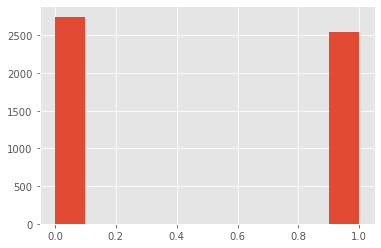

In [502]:
df.target.hist()

In [503]:
df.isnull().sum()

ID        0
text      0
target    0
dtype: int64

In [67]:
df['text'].nunique()

5287

In [68]:
df[['text', 'target']].nunique()

text      5287
target       2
dtype: int64

In [69]:
df_test.head()

,ID,text
0,test_2,Why is explained in the video take a look
1,test_3,Ed Davey fasting for Ramadan No contest
2,test_4,Is Doja Cat good or do you just miss Nicki Minaj
3,test_8,How Boris Johnson s cheery wounded in action p...
4,test_9,Man it s terrible Not even a reason to get on ...


In [70]:
import nltk
from nltk.tokenize import word_tokenize

tokens = word_tokenize(' '.join(df['text'].tolist()))

nltk_text = nltk.Text(tokens)

In [71]:
len(nltk_text.tokens)

107147

In [72]:
nltk_text.concordance('bitcoin')

Displaying 2 of 2 matches:
The bitcoin halving is cancelled due to MercyOf
ds KBS 100 Years of Sports shooting Bitcoin Price Above 7700 Recovering Almost 


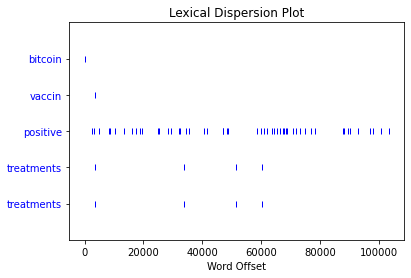

In [73]:
nltk_text.dispersion_plot(['bitcoin', 'vaccin', 'positive', 'treatments', 'treatments'])

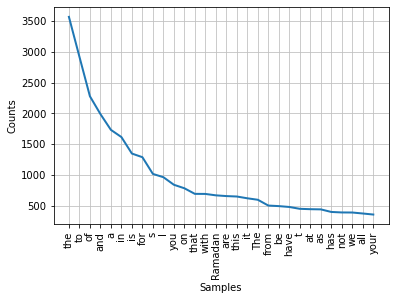

In [74]:
nltk_text.plot(30)

In [75]:
# distrubitions
fdist = nltk_text.vocab()
print("Nombre de mots : %d" % len(tokens))
print("Nombre de mots uniques : %d" % len(fdist.keys()))
print(f"Proportion de mots uniques : {len(fdist.keys())/len(tokens)}")

Nombre de mots : 107147
Nombre de mots uniques : 17625
Proportion de mots uniques : 0.1644936395792696


In [76]:
# Mots les plus présents
print("Mots les plus présents : %s" % str(fdist.most_common(10)))

Mots les plus présents : [('the', 3567), ('to', 2920), ('of', 2277), ('and', 1988), ('a', 1731), ('in', 1614), ('is', 1346), ('for', 1287), ('s', 1015), ('I', 962)]


# Processing

In [77]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
from nltk.corpus import stopwords
from textblob import TextBlob

In [85]:
str(TextBlob("I am hapy").correct())

'I am happy'

In [117]:
def processing(question):
    question = re.sub(r'\S+@[\w-]+.\w{2,3}', '', question)
    question = re.sub(r'(https|http)\S+', '', question)
    question = re.sub("<[^>]*>", "", question)
    question = re.sub(r"@\S+", "", question)
    question = re.sub(r"#\S+", "", question)
    tokens = word_tokenize(question)
    tokens = [word.lower() for word in tokens if word.isalpha() and len(word) > 1]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    stem = PorterStemmer()
    tokens = [stem.stem(word) for word in tokens]
    return ' '.join(tokens)

In [115]:
df['clean'] = df['text'].apply(processing)

In [116]:
df_test['clean'] = df_test['text'].apply(processing)

In [118]:
df.head()

,ID,text,target,clean
0,train_0,The bitcoin halving is cancelled due to,1,bitcoin halv cancel due
1,train_1,MercyOfAllah In good times wrapped in its gran...,0,mercyofallah good time wrap granular detail ch...
2,train_2,266 Days No Digital India No Murder of e learn...,1,day digit india murder learn onlin busi restor...
3,train_3,India is likely to run out of the remaining RN...,1,india like run remain rna kit essenti test one...
4,train_4,In these tough times the best way to grow is t...,0,tough time best way grow learn case teach help...


In [122]:
from textblob import TextBlob
def polarity(doc):
    return TextBlob(doc).sentiment.polarity

def subjectivity(doc):
    return TextBlob(doc).sentiment.subjectivity

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(df['clean'])

In [170]:
matrix_test = vectorizer.transform(df_test['clean'])

In [171]:
df_vecotors = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())

In [172]:
df_vecotors.head()

,aadil,aamiin,aaml,aap,aapg,aaron,aatay,ab,aba,abandon,...,zionist,zombi,zone,zoo,zoom,zoomer,zoomi,zrouf,zudo,zw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
df_test_vecotors = pd.DataFrame(matrix_test.toarray(), columns=vectorizer.get_feature_names())
df_test_vecotors.head()

,aadil,aamiin,aaml,aap,aapg,aaron,aatay,ab,aba,abandon,...,zionist,zombi,zone,zoo,zoom,zoomer,zoomi,zrouf,zudo,zw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
nunique = df_vecotors.nunique()
nunique

aadil     2
aamiin    2
aaml      2
aap       2
aapg      2
         ..
zoomer    2
zoomi     2
zrouf     2
zudo      2
zw        2
Length: 9828, dtype: int64

In [175]:
nunique[nunique == 1]

Series([], dtype: int64)

In [163]:
# df_vecotors['polarity'] = df['text'].apply(polarity)
# df_vecotors['subjectivity'] = df['text'].apply(subjectivity)

In [164]:
# df_test_vecotors['polarity'] = df_test['text'].apply(polarity)
# df_test_vecotors['subjectivity'] = df_test['text'].apply(subjectivity)

In [199]:
Y = df['target'].values
X = df_vecotors.values
X_test_sub = df_test_vecotors

In [200]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [201]:
X.shape

(5287, 9828)

In [203]:
X_test_sub.shape

(1962, 9828)

# Models

In [651]:
from sklearn.linear_model import LogisticRegression

In [652]:
reg = LogisticRegression(max_iter=150).fit(X_train, y_train)

In [653]:
reg.score(X_test, y_test)

0.8998109640831758

In [654]:
from sklearn.metrics import classification_report, confusion_matrix

In [655]:
y_pred = reg.predict(X_test)

In [656]:
y_pred

array([0, 1, 0, ..., 1, 0, 0])

[[460  82]
 [ 24 492]]


<AxesSubplot:>

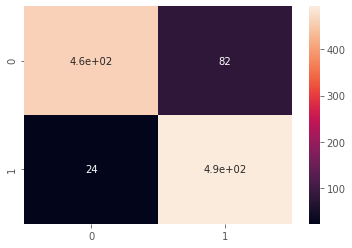

In [657]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

In [211]:
print((classification_report(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       542
           1       0.86      0.95      0.90       516

    accuracy                           0.90      1058
   macro avg       0.90      0.90      0.90      1058
weighted avg       0.90      0.90      0.90      1058



# submit

In [212]:
y_pred_test = reg.predict_proba(X_test_sub)
y_pred_test

array([[0.17678283, 0.82321717],
       [0.99831985, 0.00168015],
       [0.97512964, 0.02487036],
       ...,
       [0.9972352 , 0.0027648 ],
       [0.04524477, 0.95475523],
       [0.045403  , 0.954597  ]])

In [79]:
df_sub = pd.read_csv('updated_ss.csv')

In [80]:
df_sub.shape

(1962, 2)

In [81]:
df_sub['target'] = y_pred_test[:, 1]

In [82]:
df_sub.head()

,ID,target
0,test_2,0.818897
1,test_3,0.001586
2,test_4,0.021622
3,test_8,0.962522
4,test_9,0.020289


In [654]:
df_sub.to_csv('sub-5.csv', index=None)